# **Studi Kasus Heart Disease 5 Fitur Part 2**

Implementasi dengan Menggunakan Model `Bagging Classifier` , `Random forest` dan `Stacking clasifier`

## Membaca data

In [10]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

data = pd.read_csv('https://raw.githubusercontent.com/soumya-mishra/Heart-Disease_DT/main/heart_v2.csv')
df = data
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


### Memisahkan Label

In [11]:
y = df['heart disease'].values
y[0:5]

array([1, 0, 1, 0, 0])

In [12]:
X = df.drop(columns=['heart disease'])
X

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


## Preprocessing Data (`Min-Max`)

In [13]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
features_names = X.columns.copy()
scaled_features = pd.DataFrame(scaled, columns=features_names)
scaled_features.head(10)

,age,sex,BP,cholestrol
0,0.854167,1.0,0.339623,0.447489
1,0.791667,0.0,0.198113,1.000000
2,0.583333,1.0,0.283019,0.308219
3,0.729167,1.0,0.320755,0.312785
4,0.937500,0.0,0.245283,0.326484
5,0.750000,1.0,0.245283,0.116438
6,0.562500,1.0,0.339623,0.296804
7,0.625000,1.0,0.150943,0.257991
8,0.645833,1.0,0.433962,0.381279
9,0.708333,0.0,0.528302,0.641553


### Split Data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(scaled_features, y, test_size=0.2, random_state=40)


## Eksekusi Pada Model `Bagging Clasifier`

### Bagging Clasifier Dengan SVC

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [15]:
# import model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
# eksekusi data pada model
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
# bagging clasifier menggunakan SVC dan Gaussian(naive bayes)
# # SVC
n_estimator = range(2,101)
akurasi_bags_1 = []
for n in n_estimator:
  # inisialisasi model
  clf = BaggingClassifier(base_estimator=SVC(),
                          n_estimators=n, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_pred = clf.predict(X_test)
  # akurasi count
  akurasi_bags_1.append(accuracy_score(y_test,y_pred))

  


Visualisasi Akurasi Bagging dengan SVC

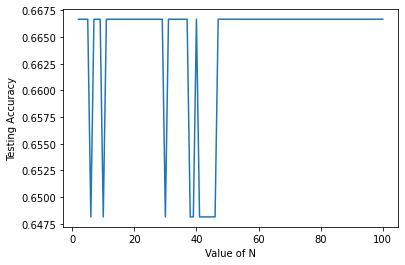

In [16]:
import matplotlib.pyplot as plt
plt.plot(n_estimator,akurasi_bags_1)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari n_estimator dengan Akurasi Tertinggi

In [17]:
akurasi_bags_1.index(max(akurasi_bags_1))+1 , max(akurasi_bags_1)

(1, 0.6666666666666666)

### Bagging Clasifier Dengan GaussianNB

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [18]:
akurasi_bags_2= []
for n in n_estimator:
  # inisialisasi model
  clf2 = BaggingClassifier(base_estimator=GaussianNB(),
                          n_estimators=n, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_pred2 = clf2.predict(X_test)
  # akurasi count
  akurasi_bags_2.append(accuracy_score(y_test,y_pred2))

Visualisasi Hasil Akurasi 

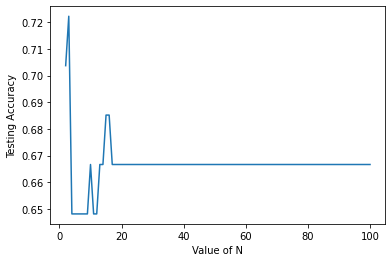

In [19]:
plt.plot(n_estimator,akurasi_bags_2)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari Akurasi Tertinggi

In [20]:
akurasi_bags_2.index(max(akurasi_bags_2))+1 , max(akurasi_bags_2)

(2, 0.7222222222222222)

## Eksekusi Pada Model `Random Forest`

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [21]:
from sklearn.ensemble import RandomForestClassifier
akurasirf= []
for n in n_estimator:
  # inisialisasi model
  rf = RandomForestClassifier(
                          n_estimators=n,max_depth=2, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_predrf = rf.predict(X_test)
  # akurasi count
  akurasirf.append(accuracy_score(y_test,y_predrf))

Visualisasi Hasil Akurasi 

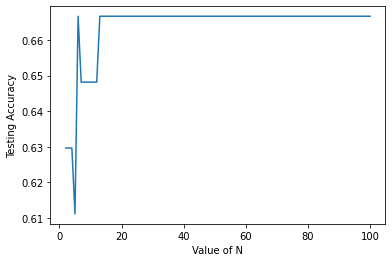

In [22]:
plt.plot(n_estimator,akurasirf)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari Akurasi Tertinggi dari N

In [23]:
akurasirf.index(max(akurasirf))+1 , max(akurasirf)

(5, 0.6666666666666666)

## Eksekusi Pada Model `Stacking clasifier`

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# estimator menggunakan Random Forest, SVC GaussianNB
## untuk n_estimators menggunakan n dengan akurasi tertinggi 
estimators = [
    ('rf', RandomForestClassifier(n_estimators=38, max_depth=2, random_state=40)),
    ('svc', SVC()),
     ('gnb', GaussianNB()),
     ('bagsvc', BaggingClassifier(base_estimator=SVC(),
                          n_estimators=14, random_state=40)),
    ('baggnb' ,BaggingClassifier(base_estimator=GaussianNB(),
                          n_estimators=9, random_state=40))
]

sc = StackingClassifier(
      estimators=estimators, final_estimator=SVC()).fit(X_train, y_train)

y_predsc = sc.predict(X_test)
akurasi = accuracy_score(y_test,y_predsc)

### Hasil Akurasi Dan Score dari Stacking Clasifier

In [25]:
print(f'Akurasi Untuk Stacking Clasifier =  {akurasi}')

Akurasi Untuk Stacking Clasifier =  0.6666666666666666
